In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

sun_data = pd.read_csv('광주_솔라_에너지_머신러닝_훈련자료.csv')
data20 = pd.read_csv('dataset_final.csv') #순천 조례동<- 아님, 23년6월~24년12월?(23년12월)
#일시, 태양방위각, 태양고도각, 발전량태그(단일), 발전량태그, 기온, 강수량, 풍속, 풍향, 습도, 증기압, 이슬점온도, 현지기압, 해면기압, 일조, 일사, 전운량, 지면온도, 일사합성0~9, 발전량

In [13]:
info_dict = dict()

column_data = "일시, 태양방위각, 태양고도각, 발전량태그(단일), 발전량태그, 기온, 강수량, 풍속, 풍향, 습도, 증기압, 이슬점온도, 현지기압, 해면기압, 일조, 일사, 전운량, 지면온도, 일사합성0, 일사합성1, 일사합성2, 일사합성3, 일사합성4, 일사합성5, 일사합성6, 일사합성7, 일사합성8, 일사합성9, 발전량"
# 문자열을 "," 기준으로 나누기
columns = [column.strip() for column in column_data.split(",")]

# 결과 출력
print(columns)

for i in range(len(sun_data.columns)):
    info_dict[sun_data.columns[i]] = columns[i]

['일시', '태양방위각', '태양고도각', '발전량태그(단일)', '발전량태그', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '일사', '전운량', '지면온도', '일사합성0', '일사합성1', '일사합성2', '일사합성3', '일사합성4', '일사합성5', '일사합성6', '일사합성7', '일사합성8', '일사합성9', '발전량']


In [14]:
info_dict

{'Date': '일시',
 'SolarAltitude': '태양방위각',
 'SolarAzimuth': '태양고도각',
 'PowerTag_Nomalizattion': '발전량태그(단일)',
 'PowerTag': '발전량태그',
 'TEMP': '기온',
 'PCP': '강수량',
 'WS': '풍속',
 'WD': '풍향',
 'HD': '습도',
 'Vp': '증기압',
 'TD': '이슬점온도',
 'SP': '현지기압',
 'SLP': '해면기압',
 'SSh': '일조',
 'SR': '일사',
 'TCF': '전운량',
 'ST': '지면온도',
 'AugRadiauce0': '일사합성0',
 'AugRadiauce1': '일사합성1',
 'AugRadiauce2': '일사합성2',
 'AugRadiauce3': '일사합성3',
 'AugRadiauce4': '일사합성4',
 'AugRadiauce5': '일사합성5',
 'AugRadiauce6': '일사합성6',
 'AugRadiauce7': '일사합성7',
 'AugRadiauce8': '일사합성8',
 'AugRadiauce9': '일사합성9',
 'Power_Target': '발전량'}

In [9]:
sun_data.columns

Index(['Date', 'SolarAltitude', 'SolarAzimuth', 'PowerTag_Nomalizattion',
       'PowerTag', 'TEMP', 'PCP', 'WS', 'WD', 'HD', 'Vp', 'TD', 'SP', 'SLP',
       'SSh', 'SR', 'TCF', 'ST', 'AugRadiauce0', 'AugRadiauce1',
       'AugRadiauce2', 'AugRadiauce3', 'AugRadiauce4', 'AugRadiauce5',
       'AugRadiauce6', 'AugRadiauce7', 'AugRadiauce8', 'AugRadiauce9',
       'Power_Target'],
      dtype='object')

In [3]:
data20.head(5)

,Unnamed: 0,기온(°C),풍속(m/s),습도(%),1분 강수량(mm),energy
0,0,0.441459,0.216418,0.610718,0.0,0.343767
1,1,0.439539,0.171642,0.612740,0.0,0.306748
2,2,0.439539,0.126866,0.613751,0.0,0.000000
3,3,0.437620,0.171642,0.615773,0.0,0.306690
4,4,0.435701,0.186567,0.619818,0.0,0.318918


In [4]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719963 entries, 0 to 4719962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   기온(°C)      float64
 2   풍속(m/s)     float64
 3   습도(%)       float64
 4   1분 강수량(mm)  float64
 5   energy      float64
dtypes: float64(5), int64(1)
memory usage: 216.1 MB


In [5]:
data20.describe()

,Unnamed: 0,기온(°C),풍속(m/s),습도(%),1분 강수량(mm),energy
count,4.719963e+06,4.719963e+06,4.719963e+06,4.719963e+06,4.719963e+06,4.719963e+06
mean,2.359981e+06,5.372651e-01,1.032510e-01,6.736464e-01,5.452707e-04,1.059178e-01
std,1.362536e+06,1.887457e-01,8.749362e-02,2.208148e-01,8.438803e-03,1.604023e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.179990e+06,3.838772e-01,3.731343e-02,5.116279e-01,0.000000e+00,0.000000e+00
50%,2.359981e+06,5.508637e-01,8.208955e-02,6.875632e-01,0.000000e+00,0.000000e+00
75%,3.539972e+06,6.948177e-01,1.567164e-01,8.634985e-01,0.000000e+00,2.883933e-01
max,4.719962e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
sun_data.head(5)

,Date,SolarAltitude,SolarAzimuth,PowerTag_Nomalizattion,PowerTag,TEMP,PCP,WS,WD,HD,...,AugRadiauce1,AugRadiauce2,AugRadiauce3,AugRadiauce4,AugRadiauce5,AugRadiauce6,AugRadiauce7,AugRadiauce8,AugRadiauce9,Power_Target
0,2017-01-01 8:00,9.054183,305.880929,1,20171,0.5,0,0.6,70,97.0,...,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.02
1,2017-01-01 9:00,18.291215,316.520616,1,20171,1.5,0,0.3,0,94.0,...,0.350000,0.350000,0.350000,0.350000,0.350000,0.350000,0.350000,0.350000,0.350000,1.43
2,2017-01-01 10:00,25.717324,329.151211,2,20172,2.8,0,0.7,250,87.0,...,0.570683,0.596639,0.803611,0.623862,0.565775,0.572804,0.601640,0.587263,0.568490,4.31
3,2017-01-01 11:00,30.626463,343.864418,3,20173,4.7,0,0.8,270,78.0,...,1.094032,1.250671,1.139555,1.219951,1.144290,1.229677,1.159019,1.151897,1.146153,9.22
4,2017-01-01 12:00,32.359053,0.000000,4,20174,6.7,0,1.0,230,68.0,...,1.412275,1.586492,1.528914,1.536110,1.551077,1.511959,1.497501,1.477924,1.436003,14.42


In [14]:
sun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32084 entries, 0 to 32083
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    32084 non-null  object 
 1   SolarAltitude           32084 non-null  float64
 2   SolarAzimuth            32084 non-null  float64
 3   PowerTag_Nomalizattion  32084 non-null  int64  
 4   PowerTag                32084 non-null  int64  
 5   TEMP                    32084 non-null  float64
 6   PCP                     32084 non-null  int64  
 7   WS                      32084 non-null  float64
 8   WD                      32084 non-null  int64  
 9   HD                      32084 non-null  float64
 10  Vp                      32084 non-null  float64
 11  TD                      32084 non-null  float64
 12  SP                      32084 non-null  float64
 13  SLP                     32084 non-null  float64
 14  SSh                     32084 non-null

In [15]:
info_dict

{'Date': '일시',
 'SolarAltitude': '태양방위각',
 'SolarAzimuth': '태양고도각',
 'PowerTag_Nomalizattion': '발전량태그(단일)',
 'PowerTag': '발전량태그',
 'TEMP': '기온',
 'PCP': '강수량',
 'WS': '풍속',
 'WD': '풍향',
 'HD': '습도',
 'Vp': '증기압',
 'TD': '이슬점온도',
 'SP': '현지기압',
 'SLP': '해면기압',
 'SSh': '일조',
 'SR': '일사',
 'TCF': '전운량',
 'ST': '지면온도',
 'AugRadiauce0': '일사합성0',
 'AugRadiauce1': '일사합성1',
 'AugRadiauce2': '일사합성2',
 'AugRadiauce3': '일사합성3',
 'AugRadiauce4': '일사합성4',
 'AugRadiauce5': '일사합성5',
 'AugRadiauce6': '일사합성6',
 'AugRadiauce7': '일사합성7',
 'AugRadiauce8': '일사합성8',
 'AugRadiauce9': '일사합성9',
 'Power_Target': '발전량'}

In [17]:
X = sun_data.drop(columns=['Date','PowerTag_Nomalizattion','PowerTag','SLP','TCF','AugRadiauce0', 'AugRadiauce1','AugRadiauce2', 'AugRadiauce3', 'AugRadiauce4', 'AugRadiauce5','AugRadiauce6', 'AugRadiauce7', 'AugRadiauce8', 'AugRadiauce9','Power_Target'])  # 'target'은 종속 변수
y = sun_data['Power_Target']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)

# LightGBM Regressor
lightgbm_model = LGBMRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_predictions = lightgbm_model.predict(X_test)

# 성능 평가
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
lightgbm_rmse = np.sqrt(mean_squared_error(y_test, lightgbm_predictions))

print(f"CatBoost RMSE: {catboost_rmse:.4f}")
print(f"LightGBM RMSE: {lightgbm_rmse:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2249
[LightGBM] [Info] Number of data points in the train set: 25667, number of used features: 13
[LightGBM] [Info] Start training from score 13.427412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

 99%|===================| 6370/6417 [00:59<00:00]        

CatBoost Feature Importance:


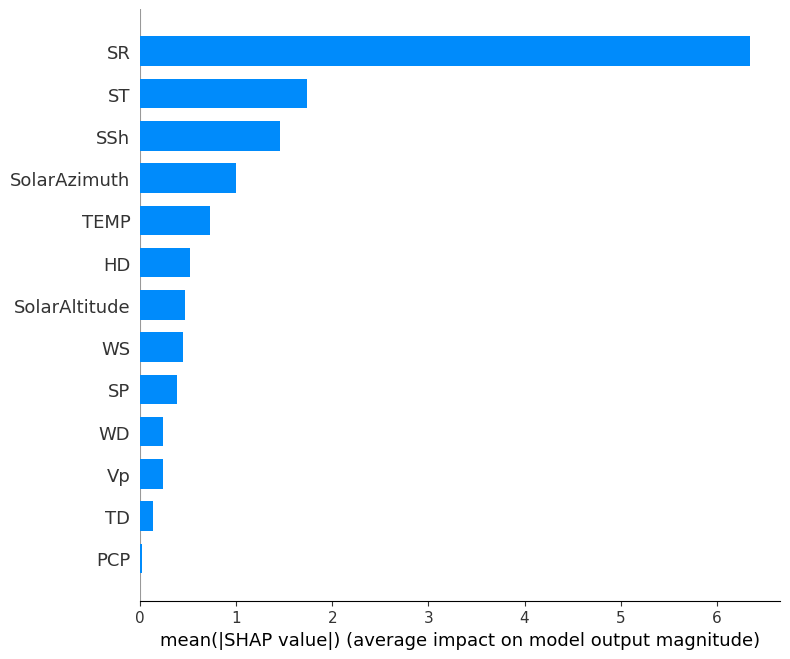

LightGBM Feature Importance:


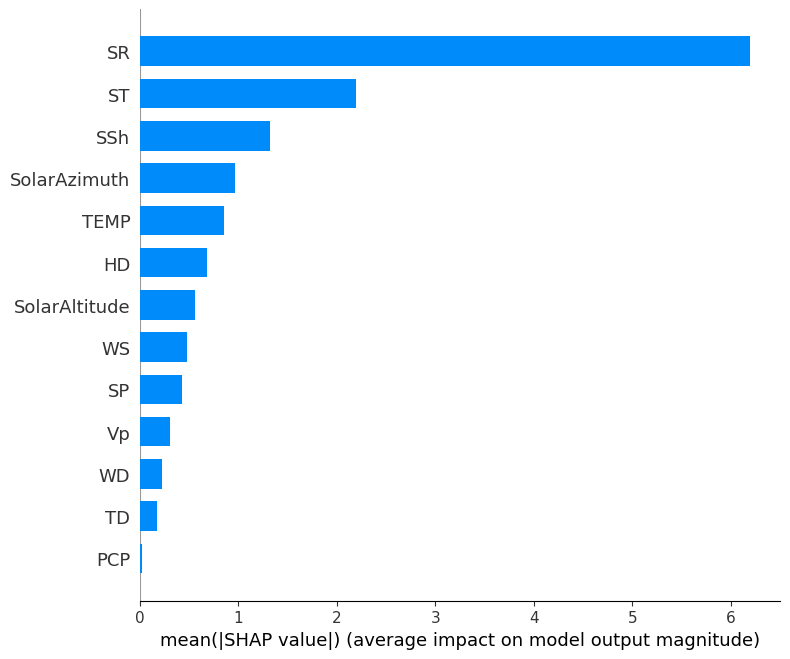

CatBoost Force Plot:
LightGBM Force Plot:
CatBoost Dependence Plot:


ValueError: Could not find feature named: feature_name

In [18]:
import shap
import matplotlib.pyplot as plt

# CatBoost 모델 분석
explainer_catboost = shap.Explainer(catboost_model, X_train)
shap_values_catboost = explainer_catboost(X_test)

# LightGBM 모델 분석
explainer_lightgbm = shap.Explainer(lightgbm_model, X_train)
shap_values_lightgbm = explainer_lightgbm(X_test)

# SHAP Summary Plot (전체 피처 중요도 시각화)
print("CatBoost Feature Importance:")
shap.summary_plot(shap_values_catboost, X_test, plot_type="bar")

print("LightGBM Feature Importance:")
shap.summary_plot(shap_values_lightgbm, X_test, plot_type="bar")

# SHAP Force Plot (개별 데이터 예측 분석)
# 특정 데이터 인덱스 선택
index = 0  # 예시로 첫 번째 테스트 데이터를 선택
print("CatBoost Force Plot:")
shap.force_plot(explainer_catboost.expected_value, shap_values_catboost[index].values, X_test.iloc[index])

print("LightGBM Force Plot:")
shap.force_plot(explainer_lightgbm.expected_value, shap_values_lightgbm[index].values, X_test.iloc[index])

# SHAP Dependence Plot (특정 피처와 타겟 관계 시각화)
print("CatBoost Dependence Plot:")
shap.dependence_plot("feature_name", shap_values_catboost.values, X_test)

print("LightGBM Dependence Plot:")
shap.dependence_plot("feature_name", shap_values_lightgbm.values, X_test)

In [16]:
info_dict

{'Date': '일시',
 'SolarAltitude': '태양방위각',
 'SolarAzimuth': '태양고도각',
 'PowerTag_Nomalizattion': '발전량태그(단일)',
 'PowerTag': '발전량태그',
 'TEMP': '기온',
 'PCP': '강수량',
 'WS': '풍속',
 'WD': '풍향',
 'HD': '습도',
 'Vp': '증기압',
 'TD': '이슬점온도',
 'SP': '현지기압',
 'SLP': '해면기압',
 'SSh': '일조',
 'SR': '일사',
 'TCF': '전운량',
 'ST': '지면온도',
 'AugRadiauce0': '일사합성0',
 'AugRadiauce1': '일사합성1',
 'AugRadiauce2': '일사합성2',
 'AugRadiauce3': '일사합성3',
 'AugRadiauce4': '일사합성4',
 'AugRadiauce5': '일사합성5',
 'AugRadiauce6': '일사합성6',
 'AugRadiauce7': '일사합성7',
 'AugRadiauce8': '일사합성8',
 'AugRadiauce9': '일사합성9',
 'Power_Target': '발전량'}

 99%|===================| 6358/6417 [01:11<00:00]        

CatBoost Feature Importance:


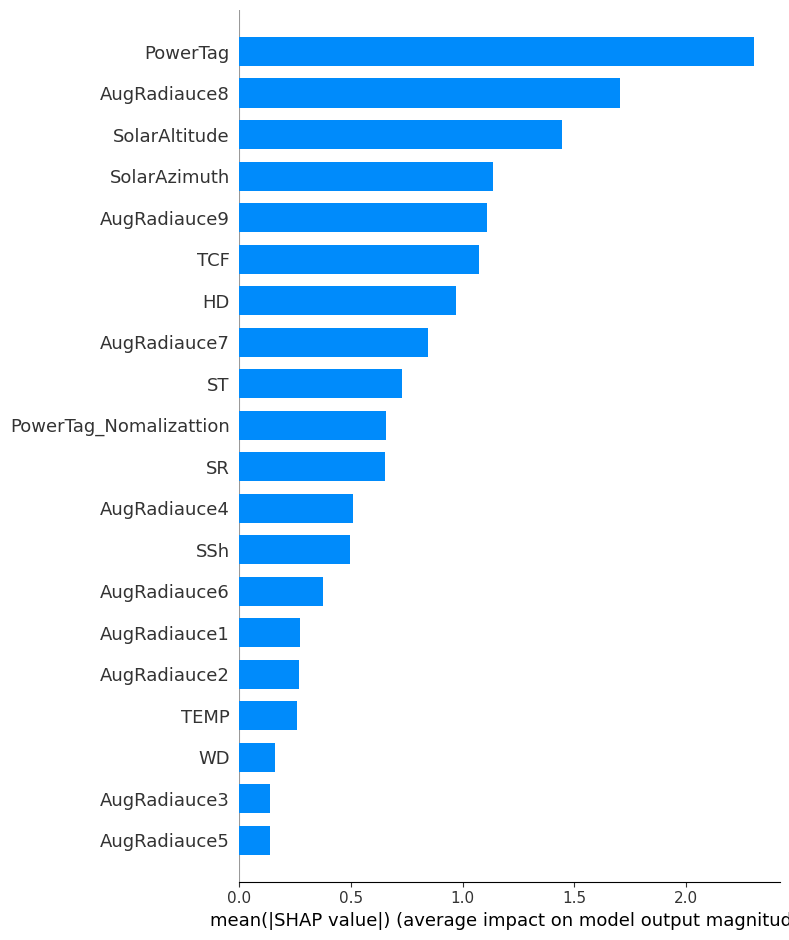

LightGBM Feature Importance:


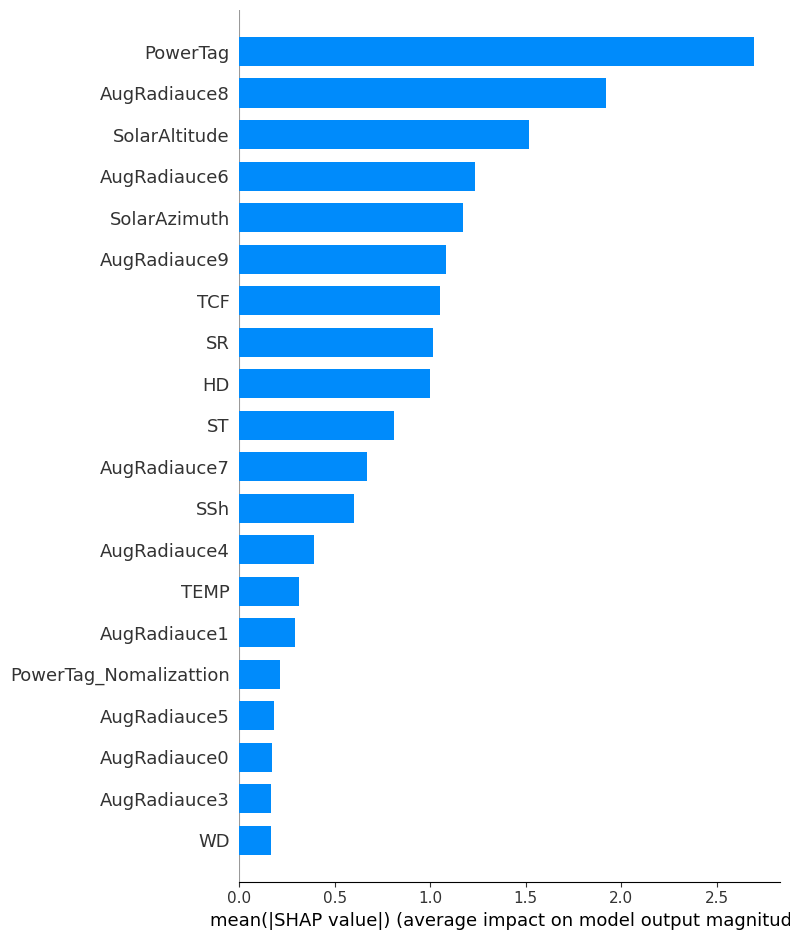

CatBoost Force Plot:
LightGBM Force Plot:
CatBoost Dependence Plot:


ValueError: Could not find feature named: feature_name

In [8]:
import shap
import matplotlib.pyplot as plt

# CatBoost 모델 분석
explainer_catboost = shap.Explainer(catboost_model, X_train)
shap_values_catboost = explainer_catboost(X_test)

# LightGBM 모델 분석
explainer_lightgbm = shap.Explainer(lightgbm_model, X_train)
shap_values_lightgbm = explainer_lightgbm(X_test)

# SHAP Summary Plot (전체 피처 중요도 시각화)
print("CatBoost Feature Importance:")
shap.summary_plot(shap_values_catboost, X_test, plot_type="bar")

print("LightGBM Feature Importance:")
shap.summary_plot(shap_values_lightgbm, X_test, plot_type="bar")

# SHAP Force Plot (개별 데이터 예측 분석)
# 특정 데이터 인덱스 선택
index = 0  # 예시로 첫 번째 테스트 데이터를 선택
print("CatBoost Force Plot:")
shap.force_plot(explainer_catboost.expected_value, shap_values_catboost[index].values, X_test.iloc[index])

print("LightGBM Force Plot:")
shap.force_plot(explainer_lightgbm.expected_value, shap_values_lightgbm[index].values, X_test.iloc[index])

# SHAP Dependence Plot (특정 피처와 타겟 관계 시각화)
print("CatBoost Dependence Plot:")
shap.dependence_plot("feature_name", shap_values_catboost.values, X_test)

print("LightGBM Dependence Plot:")
shap.dependence_plot("feature_name", shap_values_lightgbm.values, X_test)

In [4]:
sun_data.head(2)

,Date,SolarAltitude,SolarAzimuth,PowerTag_Nomalizattion,PowerTag,TEMP,PCP,WS,WD,HD,...,AugRadiauce1,AugRadiauce2,AugRadiauce3,AugRadiauce4,AugRadiauce5,AugRadiauce6,AugRadiauce7,AugRadiauce8,AugRadiauce9,Power_Target
0,2017-01-01 8:00,9.054183,305.880929,1,20171,0.5,0,0.6,70,97.0,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.02
1,2017-01-01 9:00,18.291215,316.520616,1,20171,1.5,0,0.3,0,94.0,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,1.43


In [3]:
sun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32084 entries, 0 to 32083
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    32084 non-null  object 
 1   SolarAltitude           32084 non-null  float64
 2   SolarAzimuth            32084 non-null  float64
 3   PowerTag_Nomalizattion  32084 non-null  int64  
 4   PowerTag                32084 non-null  int64  
 5   TEMP                    32084 non-null  float64
 6   PCP                     32084 non-null  int64  
 7   WS                      32084 non-null  float64
 8   WD                      32084 non-null  int64  
 9   HD                      32084 non-null  float64
 10  Vp                      32084 non-null  float64
 11  TD                      32084 non-null  float64
 12  SP                      32084 non-null  float64
 13  SLP                     32084 non-null  float64
 14  SSh                     32084 non-null

In [4]:
sun_data.describe()

,SolarAltitude,SolarAzimuth,PowerTag_Nomalizattion,PowerTag,TEMP,PCP,WS,WD,HD,Vp,...,AugRadiauce1,AugRadiauce2,AugRadiauce3,AugRadiauce4,AugRadiauce5,AugRadiauce6,AugRadiauce7,AugRadiauce8,AugRadiauce9,Power_Target
count,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,...,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000,32084.000000
mean,29.876370,150.401933,3.020758,20202.865229,17.449769,0.062181,1.683300,163.527927,64.286289,15.191631,...,1.187888,1.178893,1.168861,1.158376,1.148780,1.138599,1.128690,1.118849,1.108757,13.433697
std,23.157092,118.503164,2.178147,19.981136,9.421373,0.241487,1.140607,119.356733,23.945686,10.181765,...,0.981800,0.973682,0.966033,0.959257,0.953274,0.947568,0.941734,0.936236,0.930510,11.636381
min,-21.799623,0.000000,1.000000,20171.000000,-12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.100226,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000096
25%,13.073996,55.885267,1.000000,20184.000000,10.000000,0.000000,0.900000,50.000000,46.000000,6.100000,...,0.310000,0.310000,0.320000,0.320000,0.320000,0.320000,0.320000,0.320000,0.320000,3.010000
50%,30.463525,95.061353,3.000000,20202.000000,19.000000,0.000000,1.500000,200.000000,63.000000,12.800000,...,0.962533,0.952126,0.937917,0.921383,0.911762,0.895705,0.880403,0.866078,0.848979,10.530000
75%,46.889511,285.040611,4.000000,20221.000000,25.100000,0.000000,2.300000,270.000000,86.000000,23.400000,...,1.923922,1.903362,1.884950,1.867991,1.853462,1.836554,1.818748,1.803892,1.785791,21.870000
max,78.500970,343.973368,10.000000,20240.000000,37.800000,1.000000,10.300000,360.000000,99.000000,41.900000,...,4.169640,4.000843,3.992426,4.074664,3.990392,3.927314,3.852263,3.899610,3.836504,49.867033
